In [1]:
import importlib
DATA_DIR = '../VOC/VOCdevkit/'
import _init_paths;
import datasets.pascal_voc as pascal_voc; importlib.reload(pascal_voc)
from utils.config import cfg
import roi_data_layer.roidb as rdl_roidb
import datasets.factory; importlib.reload(datasets.factory)
from datasets.factory import get_imdb
from roi_data_layer.minibatch import get_minibatch

import utils.general; importlib.reload(utils.general); 
from utils.general import *

import data_utils; importlib.reload(data_utils); 
from data_utils import *

import PIL


In [1]:
import importlib

import dataset_roidb; importlib.reload(dataset_roidb); 
from dataset_roidb import *

Loaded dataset `voc_2007_trainval` for training
Set proposal method: selective_search
Appending horizontally-flipped training examples...
voc_2007_trainval ss roidb loaded from /home/slav/DL/RCNN/data/cache/voc_2007_trainval_selective_search_roidb.pkl
done
Preparing training data...
done


In [7]:
len(roidb[1]['bbox_targets'])

2745

In [50]:
sample = roidb[1]
boxes = sample['boxes']
max_overlaps = sample['max_overlaps']
gt_indexes = (max_overlaps == 1)
gt_boxes = boxes[gt_indexes]
img = PIL.Image.open(sample['image'])
if sample['flipped'] == True:
    img = PIL.ImageOps.mirror(img)

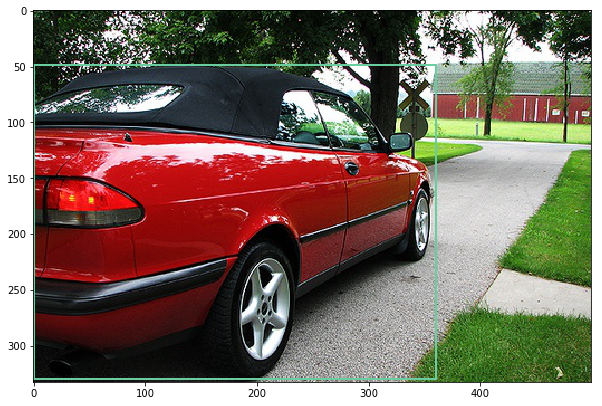

In [47]:
display_image_regions(img, x1y1x2y2_to_xywh(gt_boxes))

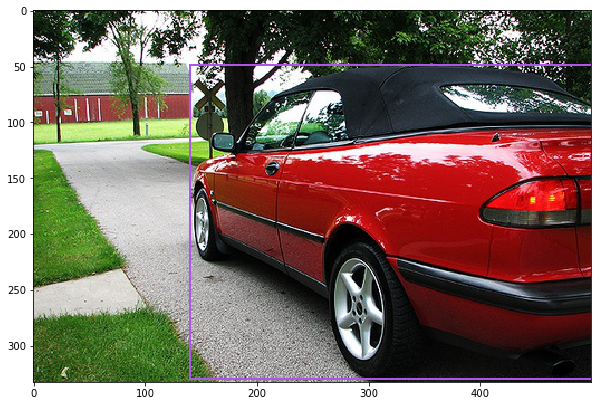

In [51]:
display_image_regions(img, x1y1x2y2_to_xywh(gt_boxes))

In [52]:
roidb[0]

{'boxes': array([[262, 210, 323, 338],
        [164, 263, 252, 371],
        [240, 193, 294, 298],
        ..., 
        [349, 363, 370, 374],
        [349, 363, 371, 374],
        [349, 363, 377, 374]], dtype=uint16),
 'flipped': False,
 'gt_classes': array([9, 9, 9, ..., 0, 0, 0], dtype=int32),
 'gt_overlaps': <2433x21 sparse matrix of type '<class 'numpy.float32'>'
 	with 852 stored elements in Compressed Sparse Row format>,
 'height': 375,
 'image': '../VOC/VOCdevkit/VOC2007/JPEGImages/000005.jpg',
 'max_classes': array([9, 9, 9, ..., 0, 0, 0]),
 'max_overlaps': array([ 1.,  1.,  1., ...,  0.,  0.,  0.], dtype=float32),
 'seg_areas': array([ 7998.,  9701.,  5830., ...,     0.,     0.,     0.], dtype=float32),
 'width': 500}

In [4]:
ss_roidb = imdb.selective_search_roidb()

voc_2007_trainval ss roidb loaded from /home/slav/DL/RCNN/data/cache/voc_2007_trainval_selective_search_roidb.pkl


In [9]:
len(ss_roidb)

5011

In [ ]:
# A roidb is a list of dictionaries, each with the following keys:
#   boxes
#   gt_overlaps
#   gt_classes
#   flipped

In [10]:
ss_roidb[0]

{'boxes': array([[262, 210, 323, 338],
        [164, 263, 252, 371],
        [240, 193, 294, 298],
        ..., 
        [349, 363, 370, 374],
        [349, 363, 371, 374],
        [349, 363, 377, 374]], dtype=uint16),
 'flipped': False,
 'gt_classes': array([9, 9, 9, ..., 0, 0, 0], dtype=int32),
 'gt_overlaps': <2433x21 sparse matrix of type '<class 'numpy.float32'>'
 	with 852 stored elements in Compressed Sparse Row format>,
 'seg_areas': array([ 7998.,  9701.,  5830., ...,     0.,     0.,     0.], dtype=float32)}

In [11]:
len(ss_roidb[0]['boxes'])

2433

In [9]:
batch = get_minibatch(roidb[:9984], 21)

AssertionError: num_images (9984) must divide BATCH_SIZE (128)

In [10]:
roi = roidb[0]

In [13]:
roi

{'boxes': array([[262, 210, 323, 338],
        [164, 263, 252, 371],
        [240, 193, 294, 298],
        ..., 
        [349, 363, 370, 374],
        [349, 363, 371, 374],
        [349, 363, 377, 374]], dtype=uint16),
 'flipped': False,
 'gt_classes': array([9, 9, 9, ..., 0, 0, 0], dtype=int32),
 'gt_overlaps': <2433x21 sparse matrix of type '<class 'numpy.float32'>'
 	with 852 stored elements in Compressed Sparse Row format>,
 'height': 375,
 'image': '../VOC/VOCdevkit/VOC2007/JPEGImages/000005.jpg',
 'max_classes': array([9, 9, 9, ..., 0, 0, 0]),
 'max_overlaps': array([ 1.,  1.,  1., ...,  0.,  0.,  0.], dtype=float32),
 'seg_areas': array([ 7998.,  9701.,  5830., ...,     0.,     0.,     0.], dtype=float32),
 'width': 500}